In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM monero''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Monero,XMR,2014-05-22 23:59:59,2.18888,1.35909,1.58940,2.09558,132918.0,1.855608e+06
1,2,Monero,XMR,2014-05-23 23:59:59,3.43437,2.05104,2.05104,2.96302,266852.0,2.692180e+06
2,3,Monero,XMR,2014-05-24 23:59:59,4.01424,2.61778,2.92039,3.70245,248028.0,3.456658e+06
3,4,Monero,XMR,2014-05-25 23:59:59,4.04303,2.80330,4.04303,3.13856,283545.0,2.993339e+06
4,5,Monero,XMR,2014-05-26 23:59:59,3.76235,2.31202,3.21897,3.02186,220148.0,2.946133e+06


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2602 non-null   object 
 1   Symbol      2602 non-null   object 
 2   Date        2602 non-null   object 
 3   High        2602 non-null   float64
 4   Low         2602 non-null   float64
 5   Open        2602 non-null   float64
 6   Close       2602 non-null   float64
 7   Volume      2602 non-null   float64
 8   Marketcap   2602 non-null   float64
 9   Range       2602 non-null   float64
 10  Difference  2602 non-null   float64
dtypes: float64(8), object(3)
memory usage: 223.7+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2602 non-null   object        
 1   Symbol      2602 non-null   object        
 2   Date        2602 non-null   datetime64[ns]
 3   High        2602 non-null   float64       
 4   Low         2602 non-null   float64       
 5   Open        2602 non-null   float64       
 6   Close       2602 non-null   float64       
 7   Volume      2602 non-null   float64       
 8   Marketcap   2602 non-null   float64       
 9   Range       2602 non-null   float64       
 10  Difference  2602 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 223.7+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,2.602000e+03,2602.000000,2602.000000
mean,77.357637,70.481496,74.069198,74.134773,1.637467e+08,1.236534e+09,6.876141,0.065575
std,96.070702,85.520895,91.188680,91.180556,9.193947e+08,1.534699e+09,13.596326,8.967255
min,0.251757,0.212967,0.220121,0.223522,7.899570e+03,1.279606e+06,0.010320,-141.550416
25%,1.706342,1.472560,1.575765,1.588685,1.735218e+05,9.731418e+06,0.153380,-0.685862
50%,52.737242,49.691152,51.254060,51.337759,2.466770e+07,8.558357e+08,2.340950,0.000685
75%,105.886750,99.589450,103.467749,102.915250,1.034612e+08,1.708818e+09,7.080032,0.942281
max,517.620245,453.390991,483.709977,483.583612,2.895912e+10,8.658968e+09,191.717897,93.484009


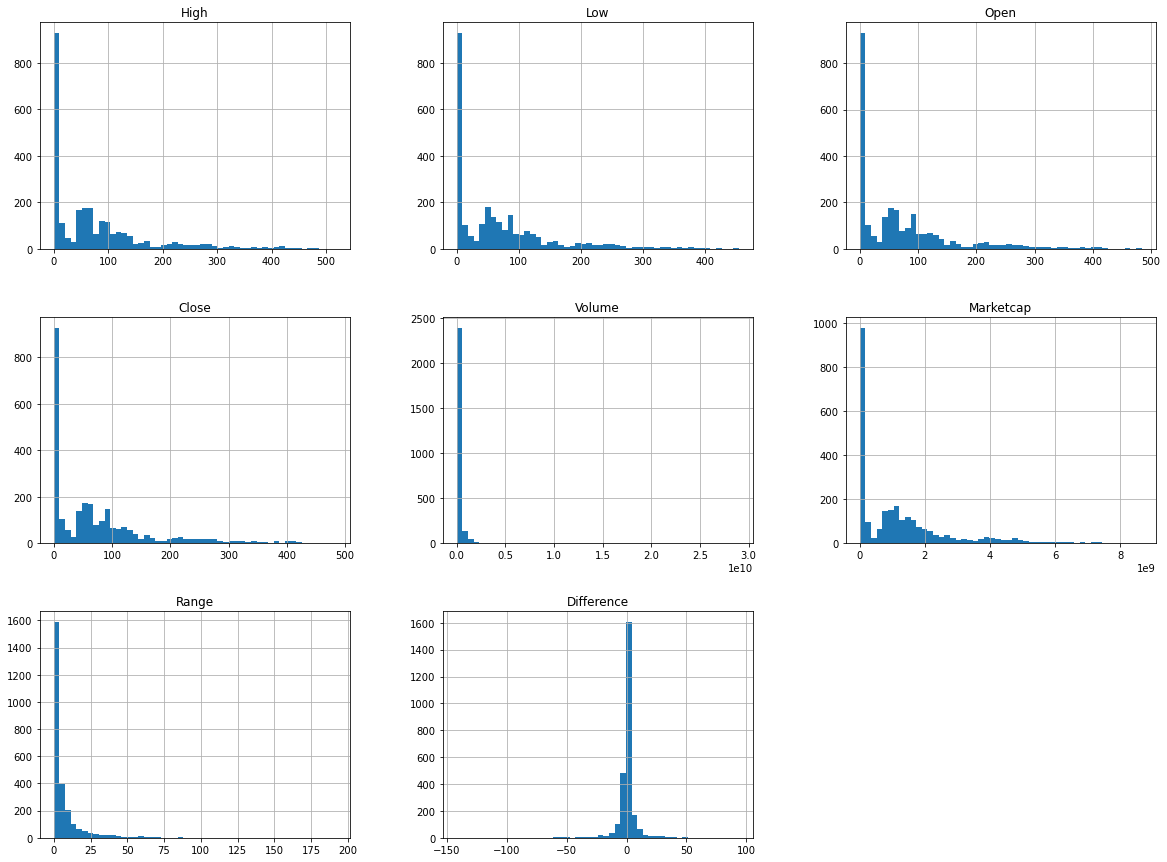

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2553,1334,1309,2586,2546,1385,1311,1326,1308,2551
Date,2021-05-19 23:59:59,2018-01-16 23:59:59,2017-12-22 23:59:59,2021-06-21 23:59:59,2021-05-12 23:59:59,2018-03-08 23:59:59,2017-12-24 23:59:59,2018-01-08 23:59:59,2017-12-21 23:59:59,2021-05-17 23:59:59
Difference,-141.550416,-95.891022,-73.415985,-61.334304,-60.827554,-59.492004,-53.955017,-53.27298,-52.306976,-50.930341


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1307,2554,1324,1292,1337,2462,2530,2524,1363,1314
Date,2017-12-20 23:59:59,2021-05-20 23:59:59,2018-01-06 23:59:59,2017-12-05 23:59:59,2018-01-19 23:59:59,2021-02-17 23:59:59,2021-04-26 23:59:59,2021-04-20 23:59:59,2018-02-14 23:59:59,2017-12-27 23:59:59
Difference,93.484009,84.171845,67.406006,58.356003,50.487,49.739989,46.731909,44.300939,42.324982,40.54599


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

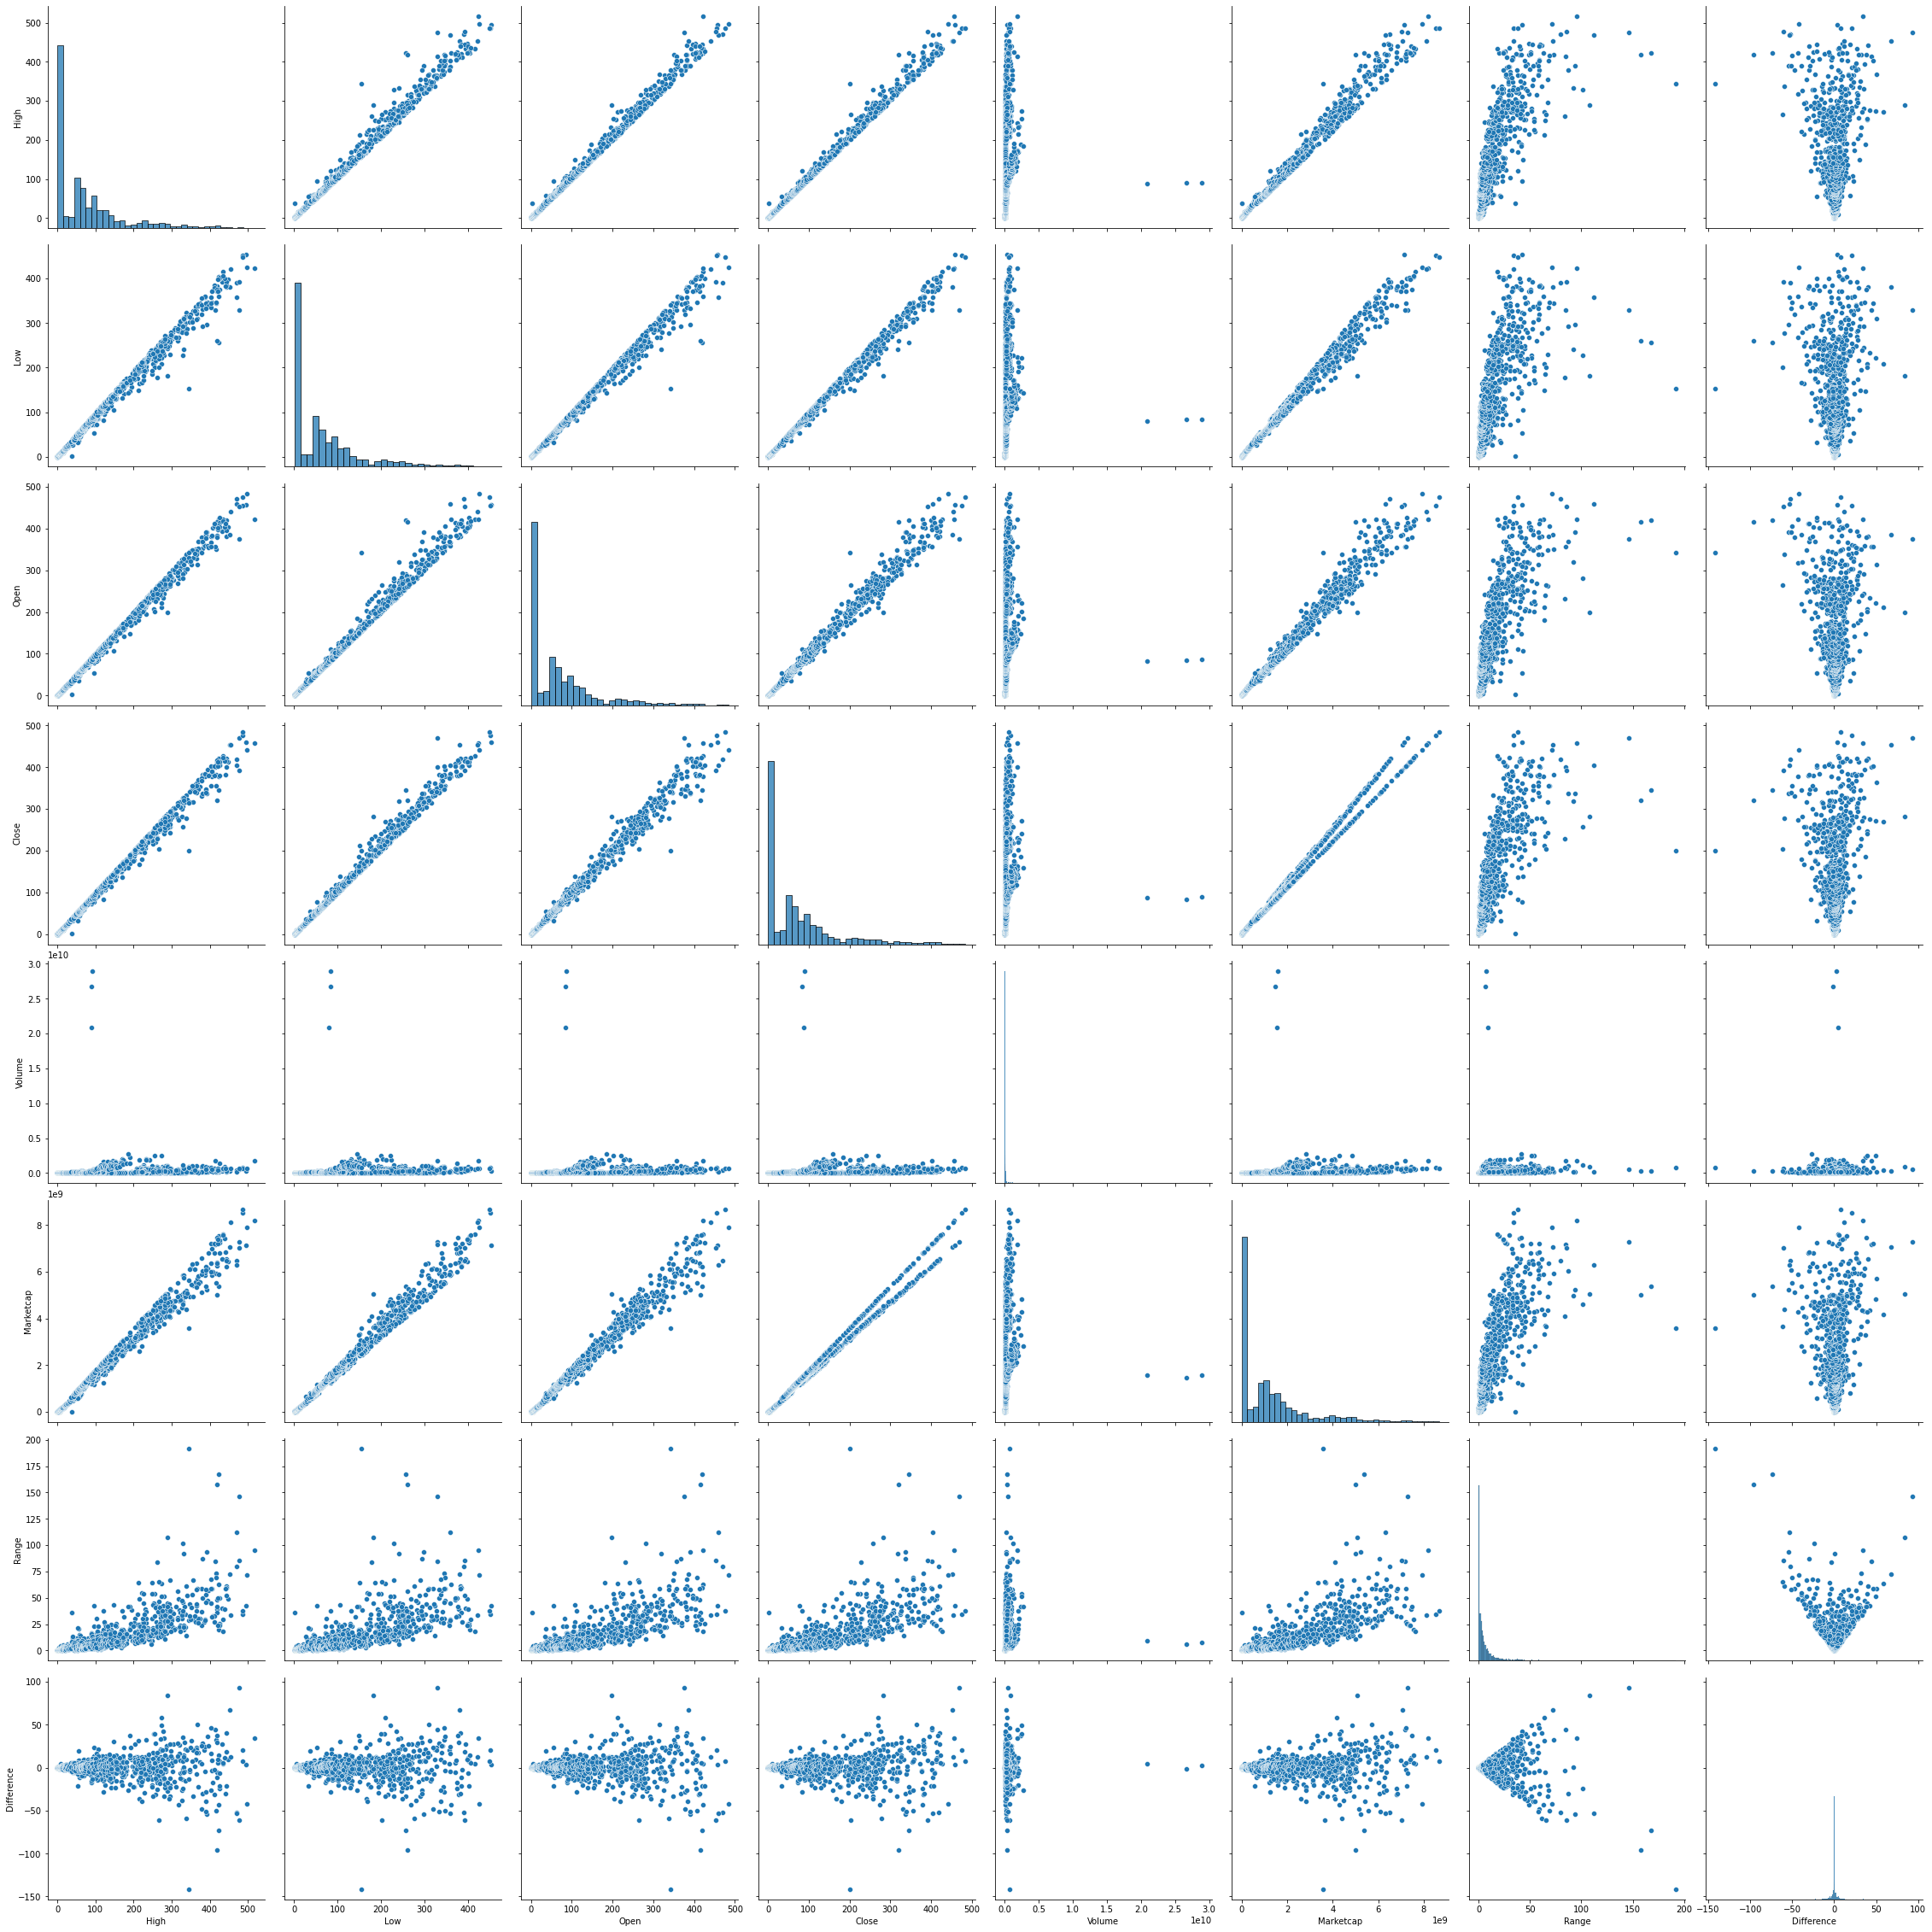

In [15]:
sns.pairplot(data,height=4);
